# Extracting 10K fact values
First, use another script to make sure the TICKER.json exist <br>
We can then copy the trimmed Json to chatgpt, and then ask for drafting graph and equity report

In [6]:
import requests
import json
from sec_cik_mapper import StockMapper
global symbol
from IPython.display import HTML, display

def obtain_trimmed_fact(data, fact,years):
    print(data['facts']['us-gaap'][f'{fact}']['label'])
    print(data['facts']['us-gaap'][f'{fact}']['description'])
    available_forms = [i['form'] for i in (data['facts']['us-gaap'][f'{fact}']['units']['USD'])]
    data = data['facts']['us-gaap'][f'{fact}']['units']['USD']
    
    print(f"The available forms are: {set(available_forms)}")
    form_selected = input (r"Filter to display which form?")
    new_list = []
    if form_selected:
        for i in data:
            if i['form'] == form_selected:
                new_list.append(i)
        return new_list[-years:]
    elif form_selected == "":
        return data

def obtain_trimmed_fact(data, fact, years):
    print(data['facts']['us-gaap'][f'{fact}']['label'])
    print(data['facts']['us-gaap'][f'{fact}']['description'])
    available_forms = [i['form'] for i in (data['facts']['us-gaap'][f'{fact}']['units']['USD'])]
    data = data['facts']['us-gaap'][f'{fact}']['units']['USD']
    
    print(f"The available forms are: {set(available_forms)}")
    form_selected = input (r"Filter to display which form? ")
    new_list = []
    if form_selected:
        for i in data:
            if i['form'] == form_selected:
                new_list.append(i)
        result = ','.join(str(i) for i in new_list[-years:])
    elif form_selected == "":
        result = ','.join(str(i) for i in data)
    #print(result)
    return result
    




## Inputting ticker and load Json

In [7]:
ticker = "agba"
file_path = f"./SEC_company_facts/{ticker.upper()}.json"
with open(file_path, 'r') as f:
    data = json.load(f)
    print(f'{ticker.upper()}.json loaded')

AGBA.json loaded


## Generating ALL fact labels and Copy Buttons

In [8]:
fact_list = [i for i in data['facts']['us-gaap'].keys()]



# Create a HTML table with copy buttons
html_table = "<table>"
for item in fact_list:
    html_table += f"<tr><td>{item}</td><td><button onclick='copyToClipboard(this.parentNode.parentNode.cells[0].textContent); this.style.background = \"#aaa\"; this.style.color = \"#fff\";'>Copy</button></td></tr>"
html_table += "</table>"

# Define the copyToClipboard function
copy_js = """
<script>
function copyToClipboard(text) {
    const textarea = document.createElement('textarea');
    textarea.value = text;
    document.body.appendChild(textarea);
    textarea.select();
    document.execCommand('copy');
    document.body.removeChild(textarea);
}
</script>
"""

# Display the HTML table and JavaScript code
display(HTML(html_table + copy_js))

AccruedLiabilitiesCurrent,Copy
AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax,Copy
AccumulatedOtherComprehensiveIncomeLossNetOfTax,Copy
AccumulatedOtherComprehensiveIncomeLossOtherThanTemporaryImpairmentNotCreditLossNetOfTaxAvailableforsaleDebtSecurities,Copy
AdditionalPaidInCapital,Copy
Assets,Copy
AssetsCurrent,Copy
AssetsDesignatedToClosedBlockEquitySecuritiesAvailableForSaleAtFairValue,Copy
AssetsHeldInTrust,Copy
AssetsHeldInTrustCurrent,Copy
AssetsHeldInTrustNoncurrent,Copy


## Selecting Fact to give trimmed Json
Take the above fact and paste

In [11]:
fact = input("Please paste the fact selected: ")

result = obtain_trimmed_fact(data, fact, 10)

# Define the copyToClipboard function
copy_js = """
<script>
function copyToClipboard(text) {
    const elem = document.createElement('p');
    elem.textContent = text;
    elem.style.whiteSpace = 'pre'; // to preserve whitespace
    navigator.clipboard.writeText(elem.textContent);
}
</script>
"""

html_result = HTML(f"<p id='result'>{fact}: {result}</p>")
display(HTML(copy_js))
display(html_result)
display(HTML(f"<button onclick='copyToClipboard(document.querySelector(\"#result\").textContent); this.style.background = \"#aaa\"; this.style.color = \"#fff\";'>Copy to Clipboard</button>"))


Please paste the fact selected:  AccruedLiabilitiesCurrent


Accrued Liabilities, Current
Carrying value as of the balance sheet date of obligations incurred and payable, pertaining to costs that are statutory in nature, are incurred on contractual obligations, or accumulate over time and for which invoices have not yet been received or will not be rendered. Examples include taxes, interest, rent and utilities. Used to reflect the current portion of the liabilities (due within one year or within the normal operating cycle if longer).
The available forms are: {'10-K', '10-Q', '10-K/A'}


Filter to display which form?  10-K


# Graph plotting area

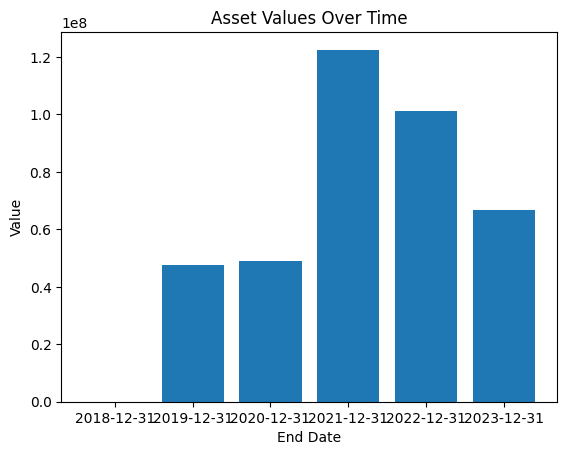

In [10]:
import matplotlib.pyplot as plt

end_dates = ['2018-12-31', '2019-12-31', '2019-12-31', '2020-12-31', '2020-12-31', '2021-12-31', '2021-12-31', '2022-12-31', '2022-12-31', '2023-12-31']
values = [72500, 47559327, 47559327, 48954047, 48954047, 40606332, 122510300, 101221333, 101221333, 66588967]

plt.bar(end_dates, values)
plt.xlabel('End Date')
plt.ylabel('Value')
plt.title('Asset Values Over Time')
plt.show()
